In [1]:
import pandas as pd
df = pd.read_csv('v2_updated_ab_test_follow-up.csv')
df

,user_crm_id,test_group,prism_plus_tier,week,nb_of_sessions,nb_of_transactions,ABV,total_transaction_revenue,coupon_usage,nb_PRSMFRND_with_user_id,total_discount,transaction_profit,transaction_total,expected_revenue,discount
0,2571480,control_group,control_platinum,2019-12-29,1,3,16.666667,50.0,0,0,0.0,10.3,NaN,NaN,NaN
1,2571480,control_group,control_platinum,2019-12-29,1,3,33.333333,100.0,0,0,0.0,11.7,NaN,NaN,NaN
2,2571480,control_group,control_platinum,2019-12-29,1,3,16.666667,50.0,0,0,0.0,6.7,NaN,NaN,NaN
3,2571480,control_group,control_platinum,2019-12-29,1,3,16.666667,50.0,0,0,0.0,13.0,NaN,NaN,NaN
4,2571480,control_group,control_platinum,2019-12-29,1,3,16.666667,50.0,0,0,0.0,3.7,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254125,7313940,control_group,control_bronze,2022-12-18,1,1,140.000000,140.0,0,0,0.0,80.1,NaN,NaN,NaN
254126,7313940,control_group,control_bronze,2022-12-18,1,1,70.000000,70.0,0,0,0.0,24.2,NaN,NaN,NaN
254127,7471434,control_group,control_bronze,2022-12-18,1,1,6120.000000,6120.0,0,0,0.0,58.7,NaN,NaN,NaN
254128,7471434,control_group,control_bronze,2022-12-18,1,1,6120.000000,6120.0,0,0,0.0,81.9,NaN,NaN,NaN


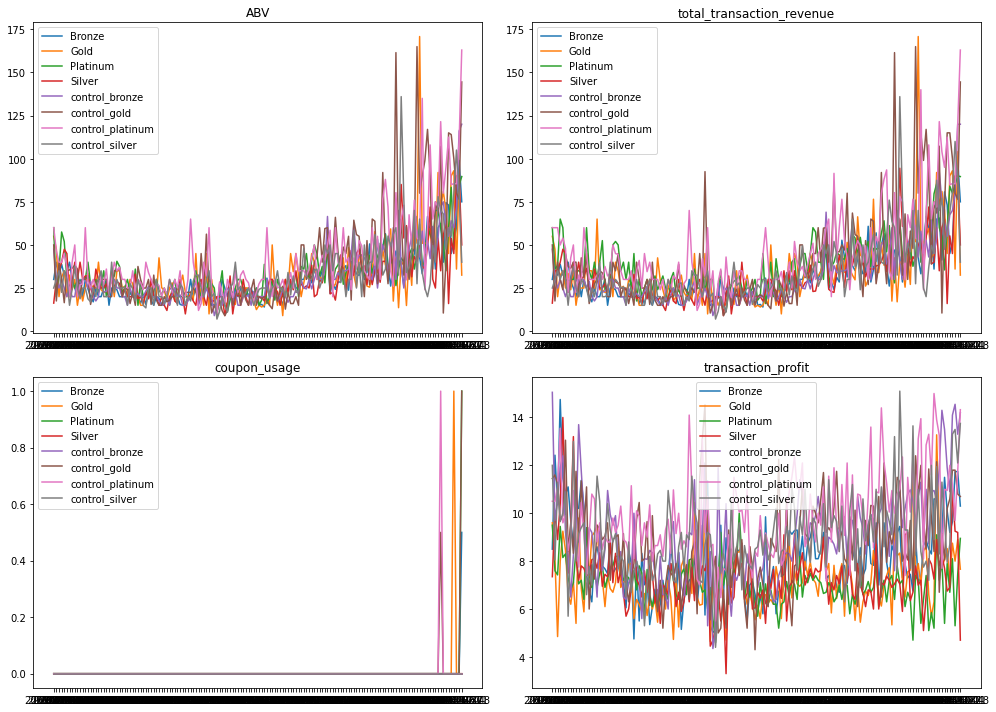

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping by prism_plus_tier and week, calculating median for specified columns
grouped = df.groupby(['prism_plus_tier', 'week']).median().reset_index()

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
columns_to_plot = ['ABV', 'total_transaction_revenue', 'coupon_usage', 'transaction_profit', 'discount']
for i, ax in enumerate(axes.flatten()):
    column = columns_to_plot[i]
    for tier, data in grouped.groupby('prism_plus_tier'):
        ax.plot(data['week'], data[column], label=tier)
    ax.set_title(column)
    ax.legend()

plt.tight_layout()
plt.show()

In [29]:
import pandas as pd

# Assuming df is your DataFrame containing the data

# Create a pivot table
df1 = df.pivot_table(index='week', columns='test_group', values='total_transaction_revenue', aggfunc='sum')

# Reorder columns to match the specified order
column_order = ['control_group', 'main_group']
df1 = df1.reindex(columns=column_order)
df1 = df1.sort_index()

# Display the resulting DataFrame
print(df1)
df1.to_csv('sum_transaction_revenue.csv', index=True)


test_group  control_group  main_group
week                                 
2019-12-29       42478.75    77456.25
2020-01-05       55515.00    75766.00
2020-01-12       38932.00    82170.50
2020-01-19       46488.00    76420.84
2020-01-26       28866.88    79192.95
...                   ...         ...
2022-11-20      209138.75   428827.58
2022-11-27       78807.00   162541.50
2022-12-04      196074.50   253787.30
2022-12-11      164569.80   310363.10
2022-12-18      339360.00    81031.60

[156 rows x 2 columns]


In [28]:
import pandas as pd

# Assuming df is your DataFrame containing the data

# Create a pivot table
df2 = df.pivot_table(index='week', columns='test_group', values='ABV', aggfunc='sum')

# Reorder columns to match the specified order
column_order = ['control_group', 'main_group']
df2 = df2.reindex(columns=column_order)
df2 = df2.sort_index()

# Display the resulting DataFrame
print(df2)
#df2.to_csv('median_ABV.csv', index=True)


test_group  control_group     main_group
week                                    
2019-12-29   40760.500000   48646.250000
2020-01-05   51587.250000   49145.777778
2020-01-12   34877.833333   54438.666667
2020-01-19   41382.750000   59599.590000
2020-01-26   26718.130000   77644.450000
...                   ...            ...
2022-11-20  200874.000000  263653.913333
2022-11-27   66623.500000  151141.500000
2022-12-04  182307.500000  191962.800000
2022-12-11  138035.966667  224395.600000
2022-12-18  338160.000000   80069.100000

[156 rows x 2 columns]


In [27]:
import pandas as pd

# Assuming df is your DataFrame containing the data

# Create a pivot table
df3 = df.pivot_table(index='week', columns='test_group', values='nb_of_transactions', aggfunc='sum')

# Reorder columns to match the specified order
column_order = ['control_group', 'main_group']
df3 = df3.reindex(columns=column_order)
df3 = df3.sort_index()

# Display the resulting DataFrame
print(df2)
#df3.to_csv('median_ABV.csv', index=True)


test_group  control_group  main_group
week                                 
2019-12-29         55.000        44.0
2020-01-05         40.000        27.0
2020-01-12         40.000        32.5
2020-01-19         35.375        50.0
2020-01-26         35.000        45.0
...                   ...         ...
2022-11-20         76.500        66.0
2022-11-27         85.000        51.0
2022-12-04         85.500        72.0
2022-12-11         90.000        90.0
2022-12-18        122.500        70.0

[156 rows x 2 columns]
